In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
import mpl_toolkits.mplot3d
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

# ПОНИЖЕНИЕ РАЗМЕРНОСТИ. ПОИСК АНОМАЛИЙ

Ссылка: https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis

Набор данных об уровне стресса студентов.

Целевая переменная - stress_level.

In [ ]:
data = pd.read_csv('StressLevelDataset.csv')
data

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


# Подготовка данных

Размер датасета

In [ ]:
data.shape

(1100, 21)

Статистическая информация

In [ ]:
data.describe(include='all')

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


Информация о наборе данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

Датасет содержит 21 столбец, 1100 строк. Все столбцы - числовые, пропусков нет.

Уровни стресса:

In [ ]:
data['stress_level'].unique()

array([1, 2, 0])

Проверим кол-во строк для каждого уровня

In [ ]:
data['stress_level'].value_counts()

,count
stress_level,
0,373
2,369
1,358


Разобьем датасет на:

Y - целевая переменная, которую предсказываем (stress_level).

X - весь набор данных без целевой переменной.

In [ ]:
X = data.drop(['stress_level'], axis=1)
y = data['stress_level']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (1100, 20) | y shape: (1100,) 


Стандартизация данных

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
colors = ['green', 'blue','red']
labels = [0,1,2]

# Метод главных компонентов (Principal Component Analysis, PCA)

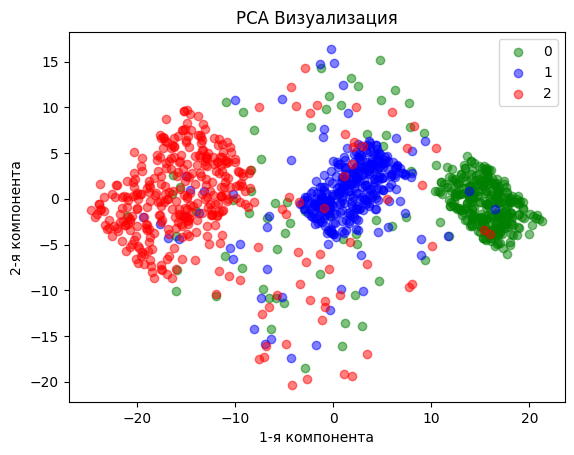

In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)


for i, label in enumerate([0,1,2]):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                c=colors[i], label=labels[i], alpha=0.5)

plt.title('РСА Визуализация')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('1-я компонента')
plt.ylabel('2-я компонента')
plt.show()

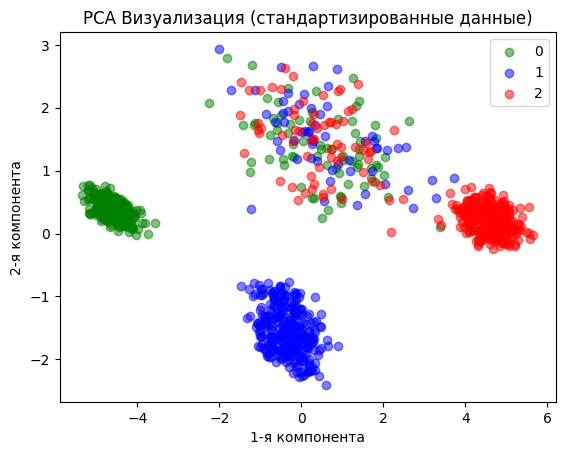

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


for i, label in enumerate([0,1,2]):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                c=colors[i], label=labels[i], alpha=0.5)

plt.title('РСА Визуализация (стандартизированные данные)')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('1-я компонента')
plt.ylabel('2-я компонента')
plt.show()

# Независисый анализ компонентов (Independent Component Analysis, ICA)

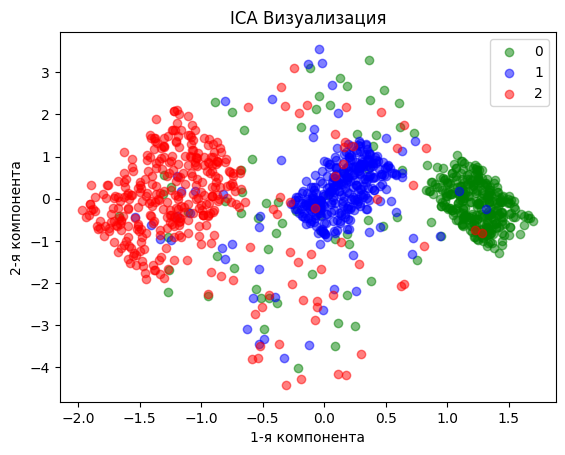

In [ ]:
fast_ica = FastICA(n_components=2)
X_ica = fast_ica.fit_transform(X)


for i, label in enumerate([0,1,2]):
    plt.scatter(X_ica[y == i, 0], X_ica[y == i, 1],
                c=colors[i], label=labels[i], alpha=0.5)

plt.title('IСА Визуализация')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('1-я компонента')
plt.ylabel('2-я компонента')
plt.show()

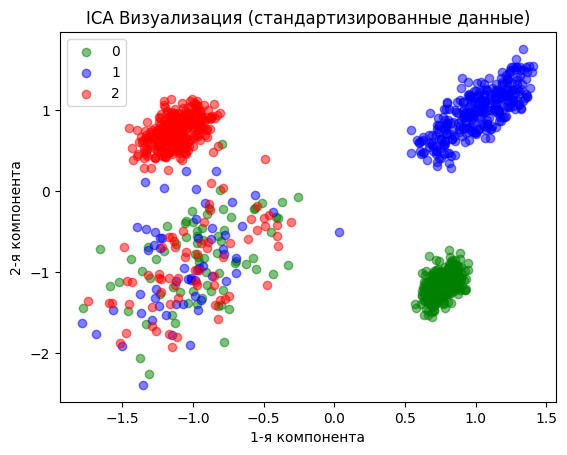

In [ ]:
fast_ica = FastICA(n_components=2)
X_ica = fast_ica.fit_transform(X_scaled)


for i, label in enumerate([0,1,2]):
    plt.scatter(X_ica[y == i, 0], X_ica[y == i, 1],
                c=colors[i], label=labels[i], alpha=0.5)

plt.title('IСА Визуализация (стандартизированные данные)')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('1-я компонента')
plt.ylabel('2-я компонента')
plt.show()

# Kernel PCA

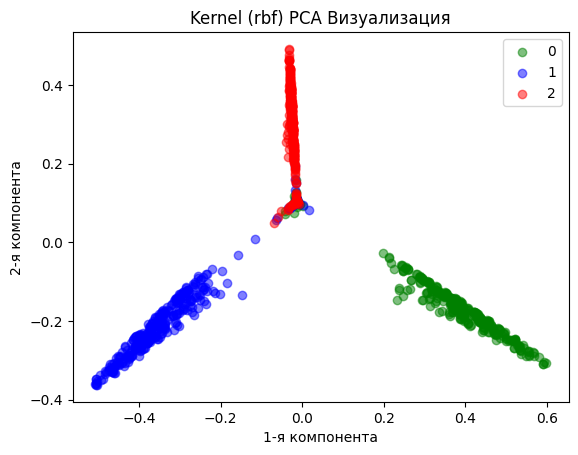

In [ ]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_rbf = rbf_pca.fit_transform(X)


for i, label in enumerate([0,1,2]):
    plt.scatter(X_rbf[y == i, 0], X_rbf[y == i, 1],
                c=colors[i], label=labels[i], alpha=0.5)

plt.title('Kernel (rbf) PCA Визуализация')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('1-я компонента')
plt.ylabel('2-я компонента')
plt.show()

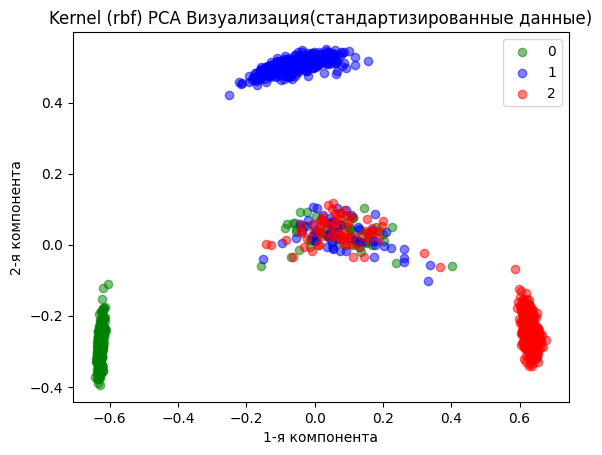

In [ ]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_rbf = rbf_pca.fit_transform(X_scaled)


for i, label in enumerate([0,1,2]):
    plt.scatter(X_rbf[y == i, 0], X_rbf[y == i, 1],
                c=colors[i], label=labels[i], alpha=0.5)

plt.title('Kernel (rbf) PCA Визуализация(стандартизированные данные)')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('1-я компонента')
plt.ylabel('2-я компонента')
plt.show()

# tSNE

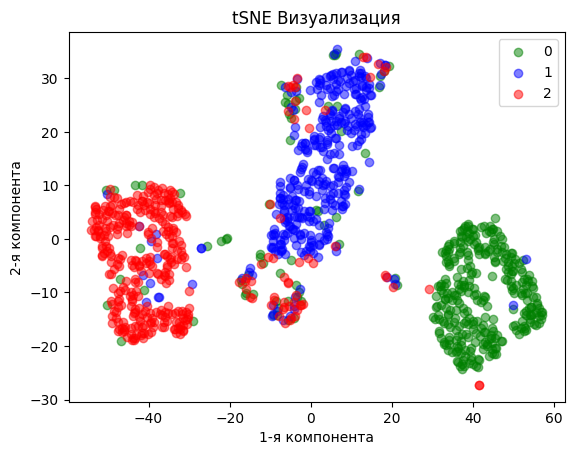

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)


for i, label in enumerate([0,1,2]):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1],
                c=colors[i], label=labels[i], alpha=0.5)

plt.title('tSNE Визуализация')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('1-я компонента')
plt.ylabel('2-я компонента')
plt.show()

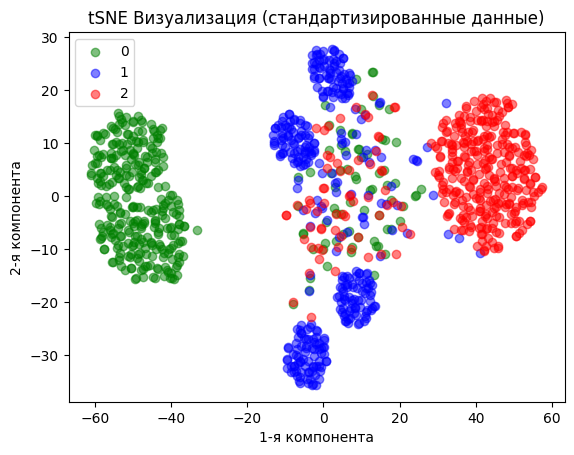

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)


for i, label in enumerate([0,1,2]):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1],
                c=colors[i], label=labels[i], alpha=0.5)

plt.title('tSNE Визуализация (стандартизированные данные)')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('1-я компонента')
plt.ylabel('2-я компонента')
plt.show()

# DBSCAN для кластеризации

In [ ]:
dbscan_cluster1 = DBSCAN(eps = 2.05, min_samples = 10)
X_new = dbscan_cluster1.fit(X_scaled)

In [ ]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 3
Estimated no. of noise points: 200
v_measure = 0.7279503702924696


При eps = 2.05, min_samples = 10 удалось найти 3 кластера, 200 точек данных были отмечены как шум, а V-мера указывает хорошую кластеризации.



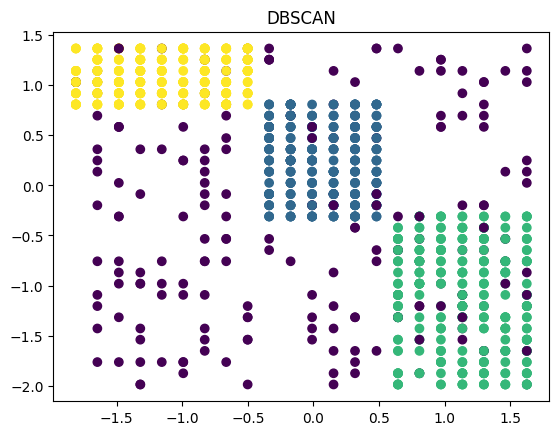

In [ ]:
X_sc = pd.DataFrame(X_scaled)
cols = X_sc.columns[:2]

plt.scatter(X_sc[cols[0]], X_sc[cols[1]],c=labels)
plt.title('DBSCAN')
plt.show()


# DBSCAN для определения выбросов

In [ ]:
dbscan = DBSCAN(eps = 2.05, min_samples = 10)
pred = dbscan.fit_predict(X_scaled)

In [ ]:
anom_index = [i for i in range(len(pred)) if pred[i] == -1]

values = X_sc.loc[anom_index]

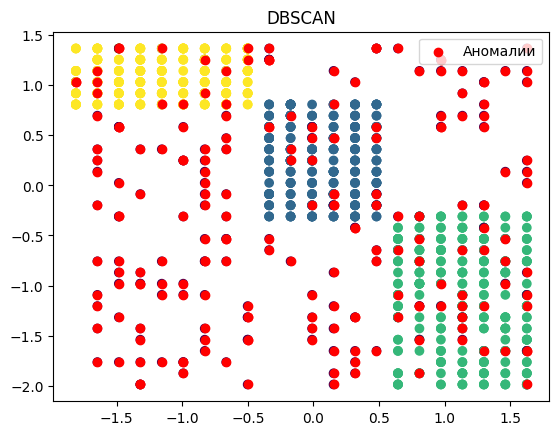

In [ ]:
plt.scatter(X_sc[cols[0]], X_sc[cols[1]],c=dbscan.labels_)
plt.scatter(values[cols[0]], values[cols[1]], color='r', label='Аномалии')
plt.title('DBSCAN')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()